In [1]:
# FILE READING
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
TweetData = pd.read_csv("Tweet.csv")
CompanyData = pd.read_csv("Company.csv")
Company_TweetData = pd.read_csv("Company_Tweet.csv")
CompanyValuesData = pd.read_csv("CompanyValues.csv")

In [2]:
print(TweetData.shape,CompanyData.shape,Company_TweetData.shape,CompanyValuesData.shape)

(3717964, 7) (6, 2) (4336445, 2) (17528, 7)


In [3]:
# SEPERATING PRICES INTO OPEN AND CLOSE TO CHECK ON WHICH DAYS WAS PRICE HIGHER THAN PREVIOUS DAY
list_of_open_prices = CompanyValuesData['open_value']
list_of_close_prices = CompanyValuesData['close_value']

In [4]:
# CREATED A LABEL FOR THE DATASET BASED ON PRICE MOVEMENT
# IF THE PRICE MOVES UP DURING THE DAY = POSITIVE -> 1
# IF THE PRICE MOVES DOWN DURING THE DAY = NEGATIVE -> 0
price_movement = []
price_movement.append(1)
for i in range(1,len(list_of_close_prices)):
    if(list_of_close_prices[i-1] < list_of_close_prices[i]):
        price_movement.append(1)
    else:
        price_movement.append(0)
price_movement_df = pd.DataFrame(price_movement, columns = ['price_movement'])

In [5]:
# ADDING THE LABEL COLUMN TO THE DATASET
CompanyValuesData["price_movement"] = price_movement_df

Counter({'AAPL': 1425013, 'TSLA': 1096868, 'AMZN': 718715, 'GOOG': 392569, 'MSFT': 375711, 'GOOGL': 327569})


<AxesSubplot:>

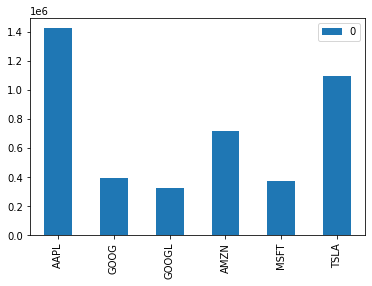

In [6]:
from collections import Counter
companyTweets = Company_TweetData['ticker_symbol']
companyNumberOfMentions = Counter(companyTweets)
print(companyNumberOfMentions)
df = pd.DataFrame.from_dict(companyNumberOfMentions, orient='index')
df.plot(kind='bar')

In [7]:
# JOINING THE TWEET_DATA AND COMPANY_TWEET_DATA TO COMBINE THEM INTO A DATASET OF TWEETS
MASTER_DATA_SET_OF_TWEETS = pd.merge(TweetData, Company_TweetData, on="tweet_id")

In [8]:
# REMOVING TWEET_ID SINCE IT WOULD HAVE NO IMPACT ON STOCK MOVEMENT
MASTER_DATA_SET_OF_TWEETS.pop('tweet_id')
MASTER_DATA_SET_OF_TWEETS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   writer         object
 1   post_date      int64 
 2   body           object
 3   comment_num    int64 
 4   retweet_num    int64 
 5   like_num       int64 
 6   ticker_symbol  object
dtypes: int64(4), object(3)
memory usage: 264.7+ MB


In [9]:
set_of_all_timestamps = MASTER_DATA_SET_OF_TWEETS['post_date']

In [10]:
# CONVERTING ALL TIMESTAMPS INTO DATES - SINCE IT'LL BE NEEDED FOR JOINING WITH COMPANY PRICE DATA
from datetime import datetime
day_date = []
for i in set_of_all_timestamps:
    dateFormatted = datetime.fromtimestamp(i).isoformat()
    dateSliced = dateFormatted[:10]
    day_date.append(dateSliced)
    

In [11]:
# REPLACING TIMESTAMPS WITH DATES
MASTER_DATA_SET_OF_TWEETS.pop('post_date')
MASTER_DATA_SET_OF_TWEETS['day_date'] = day_date

In [12]:
MASTER_DATA_SET_OF_TWEETS.head()

,writer,body,comment_num,retweet_num,like_num,ticker_symbol,day_date
0,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01
1,KeralaGuy77,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01
2,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01
3,ShowDreamCar,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01
4,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01


In [13]:
CompanyValuesData.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,price_movement
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47,1
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63,1
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09,0
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50,0
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35,1


In [14]:
# SINCE COMPANY PRICE DATA WAS FOR PAST 10 YEARS (FROM 2010-2020) BUT WE ONLY NEED IT FOR 2015-2020
# THEREFORE, DATASET NEEDED TO BE CLEANED

recentCompanyValuesData = []
count=0

for ind in CompanyValuesData.index:
    day_date = CompanyValuesData['day_date'][ind]
    if(int(day_date[:4])>=2015):
        recentCompanyValuesData.append(CompanyValuesData.iloc[ind])
    else:
        count+=1

updatedRecentCompanyValuesData = pd.DataFrame(recentCompanyValuesData) 

In [15]:
# COMBINING DIFFERENT TABLES INTO A SINGLE DATASET
MASTER_DATA_SET = pd.merge(MASTER_DATA_SET_OF_TWEETS,updatedRecentCompanyValuesData,on=['day_date','ticker_symbol'])
MASTER_DATA_SET.head()

,writer,body,comment_num,retweet_num,like_num,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,price_movement
0,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1
1,KeralaGuy77,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1
2,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1
3,aaplstocknews,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1
4,iknowfirst,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1


In [16]:
# SEPERATING THE LABEL FROM THE MASTER DATASET
Label = MASTER_DATA_SET.pop('price_movement')

In [17]:
import sklearn.model_selection as model_selection

# FUTHER REFINING THE DATASET - COALESCING 2 COLUMNS INTO ONE AND REMOVING THE OTHERS NOT REQUIRED ONES
MASTER_DATA_SET['max_diff'] = MASTER_DATA_SET['high_value'] - MASTER_DATA_SET['low_value']
MASTER_DATA_SET.pop('low_value')
MASTER_DATA_SET.pop('high_value')
MASTER_DATA_SET.pop('ticker_symbol')

0           AAPL
1           AAPL
2           AAPL
3           AAPL
4           AAPL
           ...  
4335719    GOOGL
4335720    GOOGL
4335721    GOOGL
4335722    GOOGL
4335723    GOOGL
Name: ticker_symbol, Length: 4335724, dtype: object

In [18]:
MASTER_DATA_SET.head()

# SPLITTING INTO TRAIN AND TEST DATA
X_train, X_test, y_train, y_test = model_selection.train_test_split(MASTER_DATA_SET, Label, train_size=0.65, random_state=69)

In [19]:
Tweet_body_df = X_train['body']
Tweet_comment_num_df = X_train['comment_num']
Tweet_retweet_num_df = X_train['retweet_num']
Tweet_like_num_df = X_train['like_num']
pre_processed_Tweet_body_list = []

In [20]:
import spacy
import re
from spacytextblob.spacytextblob import SpacyTextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# LOADING SPACYTEXTBLOB AND VADERSENTIMENT NLP MODELS 

analyzer = SentimentIntensityAnalyzer()
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [21]:
from nltk.corpus import stopwords  
from nltk.stem.snowball import SnowballStemmer
import time
import progressbar

length = 100000
bar = progressbar.ProgressBar(maxval=length, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

begintime = time.time()
print("enter 1")
english_stopwords = stopwords.words('english')
snow_stemmer = SnowballStemmer(language='english')
security_list = ["goog","googl","aapl","msft","tsla","amzn"]

count = 0
polarity_list = []
tweet_body_preprocessed = []
bar.start()
for ind in range(length):#len(Tweet_body_df)):
    bar.update(ind+1)
    tweet = Tweet_body_df.iloc[ind]
    tweet = re.sub('https?', ' https', tweet)
    tweet_list = tweet.split('$')
    tweet_list_cleaned = [i.strip().lower() for i in tweet_list if (i.strip().lower() in security_list or len(i.strip()) >= 5)]
    tweet = " ".join(tweet_list_cleaned)
    tweet_body_preprocessed.append(tweet)
bar.finish()
print("enter 2")
bar.start()
tweet_body_preprocessed_df = pd.DataFrame(tweet_body_preprocessed,columns = ['body'])
polarity_spacy_blob_list = []
count=0
for doc in nlp.pipe(Tweet_body_df.head(length), n_process = 4, batch_size=length//10,disable = [
      'tagger','parser','ner','entity_linker',
      'entity_ruler','textcat','textcat_multilabel',
      'lemmatizer','morphologizer','attribute_ruler','senter',
      'sentencizer','tok2vec','transformer']):
    bar.update(ind+1)
    polarity_spacy_blob_list.append(doc._.polarity)
bar.finish()

bar.start()
polarity_list = []
print("enter 3")
bar.start()
for ind in range(length):#len(Tweet_body_df)):
    multiplier = 4 * Tweet_comment_num_df.iloc[ind] \
        + 2 * Tweet_retweet_num_df.iloc[ind] \
        + Tweet_like_num_df.iloc[ind]
    
    if(multiplier == 0):
        mutliplier = 1
    
    polarity_spacy_blob = polarity_spacy_blob_list[ind] * multiplier
    
    vs = analyzer.polarity_scores(tweet)
    polarity_vader_sentiment = (vs['pos'] - vs['neg']) * multiplier
    
    avg_polarity = (polarity_vader_sentiment + polarity_spacy_blob) / 2
    #Flair didn't work not that useful
    polarity_list.append(avg_polarity * 2)
bar.finish()
end = time.time()
# total time taken
print(f"Total runtime of the program is {end - begintime}")

enter 1


[========================================================================] 100%


enter 2


enter 3
Total runtime of the program is 270.9745762348175


In [22]:
polarity_df = pd.DataFrame(polarity_list, columns = ['polarity'])
polarity_df.describe()

,polarity
count,100000.000000
mean,0.497320
std,6.614617
min,-326.290000
25%,0.000000
50%,0.000000
75%,0.104000
max,973.236000


In [23]:
'''import multiprocessing
import time
import progressbar
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

length = 10000

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, n_process = 2, batch_size=1000,disable = ['tagger','parser','ner','entity_linker','entity_ruler','textcat','textcat_multilabel','lemmatizer','morphologizer','attribute_ruler','senter','sentencizer','tok2vec','transformer']):
        bar.update(ind+1)
        preproc_pipe.append(doc._.polarity)
        
bar = progressbar.ProgressBar(maxval=length, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
begintime = time.time()
bar.start()
preprocess_pipe(Tweet_body_df.head(length))
bar.finish()
end = time.time()
# total time taken
print(f"Total runtime of the program is {end - begintime}")'''

'import multiprocessing\nimport time\nimport progressbar\nimport spacy\nfrom spacytextblob.spacytextblob import SpacyTextBlob\n\nlength = 10000\n\ndef preprocess_pipe(texts):\n    preproc_pipe = []\n    for doc in nlp.pipe(texts, n_process = 2, batch_size=1000,disable = [\'tagger\',\'parser\',\'ner\',\'entity_linker\',\'entity_ruler\',\'textcat\',\'textcat_multilabel\',\'lemmatizer\',\'morphologizer\',\'attribute_ruler\',\'senter\',\'sentencizer\',\'tok2vec\',\'transformer\']):\n        bar.update(ind+1)\n        preproc_pipe.append(doc._.polarity)\n        \nbar = progressbar.ProgressBar(maxval=length,     widgets=[progressbar.Bar(\'=\', \'[\', \']\'), \' \', progressbar.Percentage()])\nbegintime = time.time()\nbar.start()\npreprocess_pipe(Tweet_body_df.head(length))\nbar.finish()\nend = time.time()\n# total time taken\nprint(f"Total runtime of the program is {end - begintime}")'

In [24]:
'''import re                                
import string    
import time

from nltk.corpus import stopwords  
from nltk.stem.snowball import SnowballStemmer

begintime = time.time()
english_stopwords = stopwords.words('english')
snow_stemmer = SnowballStemmer(language='english')
count = 0
#lenght of largest tweet = 57 words
for ind in range(1,1):
    #len(Tweet_body_df)):
    tweet = Tweet_body_df.iloc[ind]
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub('[^a-zA-z]',' ',tweet)
    tweet = tweet.split()
    tweet = [snow_stemmer.stem(i.lower()) for i in tweet if i not in english_stopwords]
    tweet = list(set(tweet))
    len_to_pad = 58 - len(tweet)
    pad_list = [ "*" for i in range(len_to_pad)]
    tweet += pad_list
    tweet_str = " ".join(tweet)
    pre_processed_Tweet_body_list.append(tweet_str)

end = time.time()
# total time taken
print(f"Total runtime of the program is {end - begintime}")'''

'import re                                \nimport string    \nimport time\n\nfrom nltk.corpus import stopwords  \nfrom nltk.stem.snowball import SnowballStemmer\n\nbegintime = time.time()\nenglish_stopwords = stopwords.words(\'english\')\nsnow_stemmer = SnowballStemmer(language=\'english\')\ncount = 0\n#lenght of largest tweet = 57 words\nfor ind in range(1,1):\n    #len(Tweet_body_df)):\n    tweet = Tweet_body_df.iloc[ind]\n    tweet = re.sub(r\'https?:\\/\\/.*[\r\n]*\', \'\', tweet)\n    tweet = re.sub(\'[^a-zA-z]\',\' \',tweet)\n    tweet = tweet.split()\n    tweet = [snow_stemmer.stem(i.lower()) for i in tweet if i not in english_stopwords]\n    tweet = list(set(tweet))\n    len_to_pad = 58 - len(tweet)\n    pad_list = [ "*" for i in range(len_to_pad)]\n    tweet += pad_list\n    tweet_str = " ".join(tweet)\n    pre_processed_Tweet_body_list.append(tweet_str)\n\nend = time.time()\n# total time taken\nprint(f"Total runtime of the program is {end - begintime}")'

In [25]:
'''from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentence = "The food was great!" 
vs = analyzer.polarity_scores(sentence)
print("{:-<65} {}".format(sentence, str(vs)))

sentence_new = "$AMZN Trending Now 11/16/2016! If you follow AMZN Share your opinions hereGo here: ---->  http://dlvr.it/MgvBgq"
vs = analyzer.polarity_scores(sentence_new)
'''

'from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer\n\nanalyzer = SentimentIntensityAnalyzer()\nsentence = "The food was great!" \nvs = analyzer.polarity_scores(sentence)\nprint("{:-<65} {}".format(sentence, str(vs)))\n\nsentence_new = "$AMZN Trending Now 11/16/2016! If you follow AMZN Share your opinions hereGo here: ---->  http://dlvr.it/MgvBgq"\nvs = analyzer.polarity_scores(sentence_new)\n'

In [26]:
#pre_processed_Tweet_body_df = pd.DataFrame(pre_processed_Tweet_body_list,columns=["Pre-Processed-Body"])

In [27]:
################ TEXT PRE PROCESSING COMPLETE ##########################

In [28]:
X_train_short = X_train.head(100000)
polarity_df = polarity_df.set_index(X_train_short.index)                      
X_train_short['polarity'] = polarity_df['polarity']
X_train_short.pop('body')
print(polarity_df)

         polarity
1330486  0.000000
638815   0.000000
2414411  0.000000
1692356  0.000000
3056858  0.000000
...           ...
1770859  0.618667
3426449  0.000000
3757358  0.052000
2099106  1.052000
1535966  0.520667

[100000 rows x 1 columns]


In [29]:
writer_df = X_train_short['writer']

writer_id = 1
writer_list = []
writer_id_list = []
for ind in range(len(writer_df)):
    writer_name = writer_df.iloc[ind]
    if writer_name not in writer_list:
        writer_list.append(writer_name)
        writer_id_list.append(writer_id)
        writer_id+=1
    else:
        index = writer_list.index(writer_name)
        writer_again = writer_id_list[index]
        writer_list.append(writer_name)
        writer_id_list.append(writer_again)
        

In [30]:
writers_df = pd.DataFrame(writer_id_list, columns=['writer_ids'])
writers_df = writers_df.set_index(X_train_short.index)
X_train_short['writer_ids'] = writers_df
X_train_short.pop('writer')
X_train_short.head()

,comment_num,retweet_num,like_num,day_date,close_value,volume,open_value,max_diff,polarity,writer_ids
1330486,0,0,0,2016-07-13,96.87,25879680,97.41,0.83,0.0,1
638815,0,0,0,2015-09-20,260.62,3760644,257.96,6.32,0.0,2
2414411,0,0,0,2017-11-02,299.26,19771280,300.13,16.06,0.0,3
1692356,0,0,0,2016-11-17,756.40,3662939,749.32,9.50,0.0,4
3056858,0,0,0,2018-08-18,217.58,35034410,213.44,4.79,0.0,5


In [31]:
day_date_df = X_train_short['day_date']
day_date_list = []

for ind in range(len(X_train_short)):
    string_date = day_date_df.iloc[ind]
    string_date = string_date.replace("-","")
    day_date_list.append(int(string_date))
    
day_date_df = pd.DataFrame(day_date_list,columns=['day_date'])
day_date_df = day_date_df.set_index(X_train_short.index)

X_train_short['day_date'] = day_date_df

In [32]:
'''import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
doc = nlp(text, disable = ['tagger','parser','ner','entity_linker','entity_ruler','textcat','textcat_multilabel','lemmatizer','morphologizer','attribute_ruler','senter','sentencizer','tok2vec','transformer'])
doc2 = nlp(text)
print(doc2._.polarity)
print(doc._.polarity)

text = 'I had a really horrible day'
doc = nlp(text, disable = ['parser','ner','entity_linker','entity_ruler','textcat','textcat_multilabel','lemmatizer','morphologizer','attribute_ruler','senter','sentencizer','tok2vec','transformer'])
doc2 = nlp(text)
print(doc2._.polarity)
print(doc._.polarity)

text = 'I had a good day'
doc = nlp(text, disable = ['parser','ner','entity_linker','entity_ruler','textcat','textcat_multilabel','lemmatizer','morphologizer','attribute_ruler','senter','sentencizer','tok2vec','transformer'])
doc2 = nlp(text)
print(doc2._.polarity)
print(doc._.polarity)

text = 'Insanity of today weirdo massive selling. '
doc = nlp(text, disable = ['parser','ner','entity_linker','entity_ruler','textcat','textcat_multilabel','lemmatizer','morphologizer','attribute_ruler','senter','sentencizer','tok2vec','transformer'])
doc2 = nlp(text)
print(doc2._.polarity)
print(doc._.polarity)'''

"import spacy\nfrom spacytextblob.spacytextblob import SpacyTextBlob\n\nnlp = spacy.load('en_core_web_sm')\nnlp.add_pipe('spacytextblob')\ntext = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'\ndoc = nlp(text, disable = ['tagger','parser','ner','entity_linker','entity_ruler','textcat','textcat_multilabel','lemmatizer','morphologizer','attribute_ruler','senter','sentencizer','tok2vec','transformer'])\ndoc2 = nlp(text)\nprint(doc2._.polarity)\nprint(doc._.polarity)\n\ntext = 'I had a really horrible day'\ndoc = nlp(text, disable = ['parser','ner','entity_linker','entity_ruler','textcat','textcat_multilabel','lemmatizer','morphologizer','attribute_ruler','senter','sentencizer','tok2vec','transformer'])\ndoc2 = nlp(text)\nprint(doc2._.polarity)\nprint(doc._.polarity)\n\ntext = 'I had a good day'\ndoc = nlp(text, disable = ['parser','ner','entity_linker','entity_ruler','textcat','textcat_multilabel','lemmatizer'

In [33]:
X_train_short.head()

,comment_num,retweet_num,like_num,day_date,close_value,volume,open_value,max_diff,polarity,writer_ids
1330486,0,0,0,20160713,96.87,25879680,97.41,0.83,0.0,1
638815,0,0,0,20150920,260.62,3760644,257.96,6.32,0.0,2
2414411,0,0,0,20171102,299.26,19771280,300.13,16.06,0.0,3
1692356,0,0,0,20161117,756.40,3662939,749.32,9.50,0.0,4
3056858,0,0,0,20180818,217.58,35034410,213.44,4.79,0.0,5


In [34]:
Y_train_short = y_train.head(length)

In [35]:
X_test_short = X_test.head(length)
Y_test_short = y_test.head(length)

In [36]:
X_test_short

#processing the dataset

#WRITERS
writer_df = X_test_short['writer']
writer_id = 1
writer_list = []
writer_id_list = []
for ind in range(len(writer_df)):
    writer_name = writer_df.iloc[ind]
    if writer_name not in writer_list:
        writer_list.append(writer_name)
        writer_id_list.append(writer_id)
        writer_id+=1
    else:
        index = writer_list.index(writer_name)
        writer_again = writer_id_list[index]
        writer_list.append(writer_name)
        writer_id_list.append(writer_again)
writers_df = pd.DataFrame(writer_id_list, columns=['writer_ids'])
writers_df = writers_df.set_index(X_test_short.index)
X_test_short['writer_ids'] = writers_df
X_test_short.pop('writer')
X_test_short.head()
        
#BODY
length = 100000
bar = progressbar.ProgressBar(maxval=length, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

begintime = time.time()

english_stopwords = stopwords.words('english')
snow_stemmer = SnowballStemmer(language='english')
security_list = ["goog","googl","aapl","msft","tsla","amzn"]

count = 0
polarity_list = []
tweet_body_preprocessed = []
bar.start()
for ind in range(length):#len(Tweet_body_df)):
    bar.update(ind+1)
    tweet = Tweet_body_df.iloc[ind]
    tweet = re.sub('https?', ' https', tweet)
    tweet_list = tweet.split('$')
    tweet_list_cleaned = [i.strip().lower() for i in tweet_list if (i.strip().lower() in security_list or len(i.strip()) >= 5)]
    tweet = " ".join(tweet_list_cleaned)
    tweet_body_preprocessed.append(tweet)
bar.finish()

bar.start()
tweet_body_preprocessed_df = pd.DataFrame(tweet_body_preprocessed,columns = ['body'])
polarity_spacy_blob_list = []
count=0
for doc in nlp.pipe(Tweet_body_df.head(length), n_process = 4, batch_size=length//10,disable = [
      'tagger','parser','ner','entity_linker',
      'entity_ruler','textcat','textcat_multilabel',
      'lemmatizer','morphologizer','attribute_ruler','senter',
      'sentencizer','tok2vec','transformer']):
    bar.update(ind+1)
    polarity_spacy_blob_list.append(doc._.polarity)
bar.finish()

bar.start()
polarity_list = []
bar.start()
for ind in range(length):#len(Tweet_body_df)):
    bar.update(ind+1)
    multiplier = 4 * Tweet_comment_num_df.iloc[ind] \
        + 2 * Tweet_retweet_num_df.iloc[ind] \
        + Tweet_like_num_df.iloc[ind]
    
    if(multiplier == 0):
        mutliplier = 1
    
    polarity_spacy_blob = polarity_spacy_blob_list[ind] * multiplier
    
    vs = analyzer.polarity_scores(tweet)
    polarity_vader_sentiment = (vs['pos'] - vs['neg']) * multiplier
    
    avg_polarity = (polarity_vader_sentiment + polarity_spacy_blob) / 2
    #Flair didn't work not that useful
    polarity_list.append(avg_polarity * 2)
    
bar.finish()
end = time.time()
# total time taken
print(f"Total runtime of the program is {end - begintime}")
polarity_df = pd.DataFrame(polarity_list, columns = ['polarity'])
polarity_df = polarity_df.set_index(X_test_short.index)                      
X_test_short['polarity'] = polarity_df['polarity']
X_test_short.pop('body')
      
#day_date
day_date_df = X_test_short['day_date']
day_date_list = []

for ind in range(len(X_test_short)):
    string_date = day_date_df.iloc[ind]
    string_date = string_date.replace("-","")
    day_date_list.append(int(string_date))
    
day_date_df = pd.DataFrame(day_date_list,columns=['day_date'])
day_date_df = day_date_df.set_index(X_test_short.index)

X_test_short['day_date'] = day_date_df

X_test_short.head()

[========================================================================] 100%


Total runtime of the program is 349.57650876045227


,comment_num,retweet_num,like_num,day_date,close_value,volume,open_value,max_diff,writer_ids,polarity
417297,0,0,0,20150622,127.61,33976180,127.49,0.98,1,0.0
718212,0,0,0,20151025,719.33,6330015,750.06,34.56,2,0.0
2247889,0,0,2,20170808,365.22,7431838,357.53,11.18,3,0.0
900936,0,2,1,20160129,55.09,83559310,54.73,1.09,4,0.0
422319,0,0,0,20150624,128.11,55077520,127.21,2.68,5,0.0


In [37]:
lr_x_train = X_train_short
lr_y_train = Y_train_short
lr_x_test = X_test_short
lr_y_test = Y_test_short

tree_x_train = X_train_short
tree_y_train = Y_train_short
tree_x_test = X_test_short
tree_y_test = Y_test_short

svm_x_train = X_train_short
svm_y_train = Y_train_short
svm_x_test = X_test_short
svm_y_test = Y_test_short

In [38]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=100000)

# fit the model with data
logreg.fit(lr_x_train,lr_y_train)

#
y_pred=logreg.predict(lr_x_test)

In [39]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test_short, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(lr_y_test, y_pred))

[[54875     0]
 [45125     0]]
Accuracy: 0.54875


In [40]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(tree_x_train,tree_y_train)

#Predict the response for test dataset
y_pred = clf.predict(tree_x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(tree_y_test, y_pred))

Accuracy: 0.90706


In [41]:
'''#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svm_x_train.head(100),svm_y_train.head(100))

#Predict the response for test dataset
y_pred = clf.predict(svm_x_test.head(100))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svm_y_test.head(100), y_pred))'''

'#Import svm model\nfrom sklearn import svm\n\n#Create a svm Classifier\nclf = svm.SVC(kernel=\'linear\') # Linear Kernel\n\n#Train the model using the training sets\nclf.fit(svm_x_train.head(100),svm_y_train.head(100))\n\n#Predict the response for test dataset\ny_pred = clf.predict(svm_x_test.head(100))\n\n#Import scikit-learn metrics module for accuracy calculation\nfrom sklearn import metrics\n\n# Model Accuracy: how often is the classifier correct?\nprint("Accuracy:",metrics.accuracy_score(svm_y_test.head(100), y_pred))'